In [1]:
import sys
from importlib import reload 
sys.path.append('./lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("euclidian", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("euclidian_corrected", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_2(for_ranking=True):
    # + not-ranking  (not-corrected euclidean version)
    return [
        ProductDistances([
            (10, Distances("euclidian", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("euclidian_corrected", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]

def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]


def make_distances_osw(for_ranking=True):
    # + not-ranking  (not-corrected euclidean version)
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum")
    ]


def make_distances_ttl2(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l2", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_hs", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq_hs", scalable=True))
        ], "sum"),
    ]



def make_distances_ttl2_lite(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l2_hs", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq_hs", scalable=True))
        ], "sum"),
    ]


def make_distances_ttl2_sq_hs(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l2_sq_hs", scalable=True))
        ], "sum"),
    ]

def make_distances_ttl3(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l3", scalable=True))  # now triple_trainable_l3_raw
        ], "sum"),
    ]


def get_dists_weights(dists):
    return [x.get_weights() for x in dists]

def get_dists_weights_osw(dists):
    for dist in dists:
        w = dist.get_weights()
        smw = w[0].numpy() * tf.nn.softmax(w[1]).numpy()
        print(dist, ":", smw / smw.sum())
    return [x.get_weights() for x in dists]

_____________


### USCA312 fake product spaces example
**(no exponential map, just default gradients & adam optimizer)**

In [8]:
_, distances_matrix = utils.get_dataset("usca312")

Loading from ../datasets/usca312.edges


In [9]:
distances_matrix

array([[0.   , 1.167, 1.579, ..., 1.209, 0.866, 1.112],
       [1.167, 0.   , 0.413, ..., 0.045, 1.904, 0.082],
       [1.579, 0.413, 0.   , ..., 0.37 , 2.312, 0.467],
       ...,
       [1.209, 0.045, 0.37 , ..., 0.   , 1.95 , 0.107],
       [0.866, 1.904, 2.312, ..., 1.95 , 0.   , 1.87 ],
       [1.112, 0.082, 0.467, ..., 0.107, 1.87 , 0.   ]])

In [10]:
d = make_model()
qs = d.sparse_arange(312)  # queries
r_matrix = np.mean(distances_matrix <= 1.)  # not used
distances_matrix.shape

(312, 312)

In [11]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

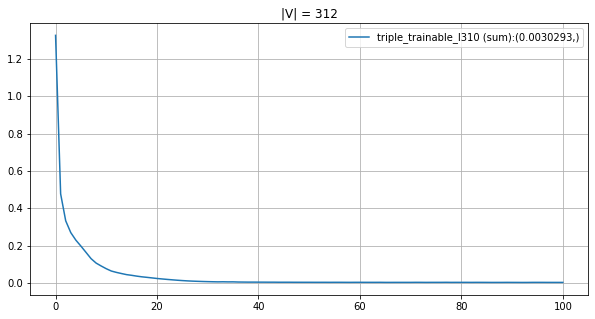


0.0030293	triple_trainable_l310 (sum)


In [12]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [13]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [8.77939449e-04 2.53022164e-03 9.55278772e-01 1.01081652e-03
 3.03250517e-03 3.01002534e-03 9.81892839e-04 1.65008418e-03
 2.00400421e-03 8.48128401e-04 1.72186785e-03 1.07822964e-03
 9.21276276e-04 1.12596099e-03 1.27109305e-03 8.80254947e-04
 5.80591311e-04 1.10068874e-03 8.16563306e-04 2.54647556e-03
 1.01156374e-03 7.75342203e-04 1.46614636e-04 8.66139847e-04
 7.46456887e-04 4.27862512e-05 8.31123141e-04 7.50757059e-04
 1.82140659e-04 8.32752710e-04 8.39036471e-04 4.30729967e-04
 9.87052281e-04 7.44991717e-04 8.32330756e-05 8.13431030e-04
 8.02976063e-04 5.66792603e-05 9.03355750e-04 6.80152440e-04
 1.16024608e-04 7.35489937e-04 8.07343823e-04 1.60176856e-03
 9.44666456e-04]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.6785108540851397>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([ 0.34322768,  1.40171224,  7.33540854,  0.48416377,  1.5827944 ,
          1.57535383,  0.45513223,  0.97423163,  1.16855261,  0.30868209,
          1.01681499,  0.5487258 ,  0.39141002,  0.59204222,  0.71328253,
          0.34586163, -0.07030286,  0.56934144,  0.27075449,  1.4081156 ,
          0.48490272,  0.21895454, -1.44654233,  0.32969643,  0.18098791,
         -2.67813313,  0.28842802,  0.18673216, -1.22957071,  0.29038678,
          0.29790423, -0.36886858,  0.46037306,  0.17902315, -2.01270514,
          0.26691119,  0.25397495, -2.39694158,  0.37176649,  0.087967  ,
         -1.68054764,  0.16618691,  0.25939968,  0.9445137 ,  0.41648196])>]]

__________________

# CS PhDs

In [16]:
G, distances_matrix = utils.get_dataset(distances_matrix=True)

Loading from ../datasets/CSPhDs.edges
|V| = 1025, |E| = 1043


In [17]:
def make_model_g(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = np.mean(distances_matrix <= 1.)
distances_matrix.shape

(1025, 1025)

In [18]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

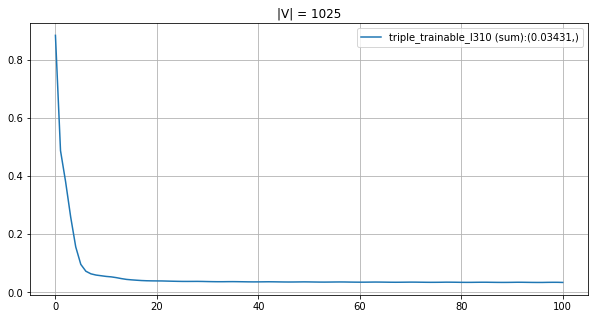

0.03431	triple_trainable_l310 (sum)


In [19]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [20]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [1.50134770e-04 3.97229895e-04 1.03749515e-04 6.36990219e-01
 2.37305764e-04 1.03709214e-05 2.75300374e-05 5.91488625e-03
 2.09129158e-01 1.50042843e-04 2.44642657e-04 4.26810149e-06
 1.38689714e-04 2.85788513e-03 4.78710665e-06 8.91420741e-05
 4.32342862e-04 7.01111816e-04 3.77673079e-05 8.13888940e-02
 1.04921822e-02 8.73242149e-05 2.90831124e-04 6.30081534e-06
 6.11239527e-05 3.37996843e-04 1.55552342e-05 6.48749800e-05
 1.14134641e-03 1.13516625e-05 1.03087087e-04 1.47635688e-03
 5.55162466e-06 1.16821628e-04 7.14844802e-04 1.68170757e-04
 1.24444731e-04 5.17023093e-04 2.27276944e-04 1.25984883e-04
 5.57565820e-04 1.59217500e-04 8.89651996e-05 4.29037917e-02
 1.19185219e-03]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.0634349640970275>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([-2.12534858, -1.15236674, -2.49490245,  6.22762765, -1.66753248,
         -4.79787606, -3.82160425,  1.54834561,  5.11382539, -2.12596106,
         -1.63708333, -5.68571282, -2.20464277,  0.82095523, -5.57095574,
         -2.6466505 , -1.067663  , -0.58421455, -3.50543807,  4.17011217,
          2.12150377, -2.66725413, -1.46413917, -5.29620289, -3.02397812,
         -1.31384538, -4.39248475, -2.9644199 , -0.09691802, -4.70751772,
         -2.5013078 ,  0.16045083, -5.42279132, -2.37623371, -0.56481647,
         -2.01190206, -2.31302024, -0.88879439, -1.71071264, -2.30072001,
         -0.81330137, -2.06661074, -2.64863665,  3.52983355, -0.05361809])>]]

__________________

# POWER

In [35]:
G, distances_matrix = utils.get_dataset("power", distances_matrix=True)

Loading from ../datasets/power.edges
|V| = 4941, |E| = 6594


In [36]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = np.mean(distances_matrix <= 1.)
distances_matrix.shape

(4941, 4941)

In [37]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

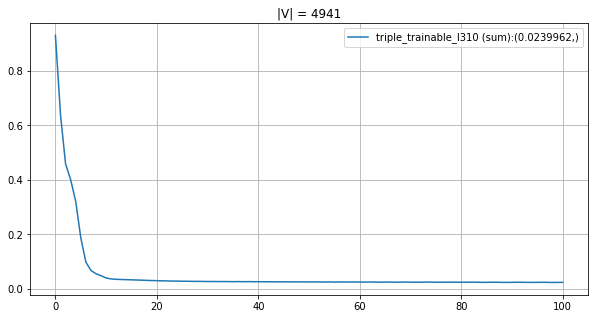

In [38]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20
)

In [39]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [2.45404635e-01 2.20808575e-05 1.55164440e-04 1.41722395e-05
 2.78577281e-05 1.68857513e-06 1.25086313e-05 2.93520230e-05
 4.79673460e-06 6.03213837e-06 2.44209681e-05 4.40792352e-06
 9.89077076e-06 1.46970657e-03 1.99428531e-06 6.32129258e-06
 2.20263585e-05 4.77712067e-06 9.44168680e-06 4.08265978e-01
 6.45629423e-06 6.02472737e-06 9.30132674e-05 5.08365301e-06
 5.54956730e-06 8.18660201e-05 5.07646286e-06 6.02435421e-06
 2.28237957e-04 2.88008531e-06 9.17212190e-06 1.32401837e-01
 3.34920661e-06 5.58855246e-06 1.55279242e-04 4.92241673e-06
 6.37863618e-06 4.68217429e-05 5.79767625e-06 5.79833869e-06
 1.64856667e-04 5.11692981e-06 9.29797020e-06 2.11230305e-01
 8.01292033e-06]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=8.305688825085943>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([ 7.38597578, -1.92997686,  0.01979754, -2.37340283, -1.6975775 ,
         -4.50080287, -2.49826901, -1.64532645, -3.45675252, -3.22758635,
         -1.82924581, -3.5412842 , -2.73308584,  2.26813013, -4.33440217,
         -3.18076421, -1.93244807, -3.46084993, -2.77955327,  7.89498623,
         -3.15963241, -3.22881569, -0.49194578, -3.39865782, -3.31096796,
         -0.61960391, -3.40007319, -3.22887763,  0.40570084, -3.966868  ,
         -2.80851926,  6.76890888, -3.81596444, -3.30396762,  0.02053714,
         -3.4308883 , -3.17173361, -1.17834023, -3.26723073, -3.26711648,
          0.08038849, -3.39213331, -2.7948918 ,  7.23601639, -2.94363264])>]]

_______________________

# Facebook

In [30]:
G, distances_matrix = utils.get_dataset("facebook", distances_matrix=True)

Loading from ../datasets/facebook.edges
|V| = 4039, |E| = 88234


In [31]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = 1. * (distances_matrix <= 1.)
distances_matrix.shape

(4039, 4039)

In [32]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

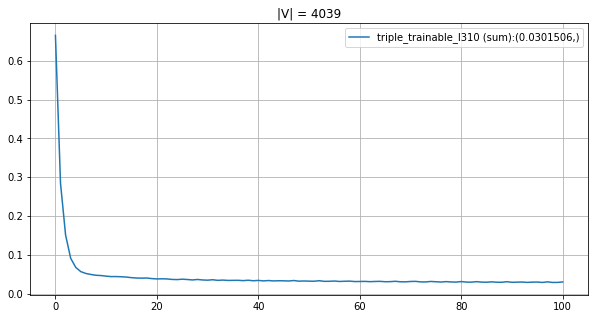

In [33]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [34]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [5.32406582e-02 2.01045185e-04 2.71295816e-06 6.74004228e-04
 2.66751379e-02 9.16177976e-05 3.25509625e-05 4.68428203e-05
 1.02258797e-06 1.23067268e-04 2.12383603e-01 2.68198265e-05
 6.10840558e-04 4.05521043e-01 1.11086046e-04 4.09555268e-05
 2.10386419e-01 4.75582682e-06 1.50534703e-05 3.87063378e-05
 1.03355038e-06 1.33185854e-04 7.11779653e-03 1.69640279e-05
 1.68779285e-03 5.31517173e-04 1.67361224e-02 1.26637964e-03
 1.54461320e-03 1.93011561e-02 2.38579906e-03 3.82046416e-02
 3.78192061e-05 4.93884539e-05 3.47657085e-04 6.91990108e-06
 6.44407482e-05 1.22906922e-04 1.26238073e-05 1.42445696e-05
 1.22128517e-04 3.01648285e-06 1.41356301e-05 4.81938632e-05
 1.58046727e-06]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.6570707603146333>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([ 3.2642542 , -2.31479375, -6.62028382, -1.10508705,  2.57316381,
         -3.10069788, -4.1355165 , -3.77152569, -7.5959868 , -2.80559233,
          4.64782593, -4.32918203, -1.20348746,  5.29460461, -2.90801835,
         -3.90583667,  4.63837777, -6.05895287, -4.90671488, -3.96232008,
         -7.58532359, -2.72657788,  1.25203005, -4.78722834, -0.18714648,
         -1.34258793,  2.10700124, -0.47440601, -0.27579463,  2.24959684,
          0.15896595,  2.93238886, -3.98550636, -3.71860677, -1.76710683,
         -5.68392196, -3.45257727, -2.8068961 , -5.08273894, -4.96194768,
         -2.81324952, -6.5142319 , -4.96962487, -3.74309174, -7.16060289])>]]

______________________
## Wiki 
### aka WLA6 - bfs on Wikipedia categories from Linear Algebra, depth = 6

In [25]:
G, distances_matrix = utils.get_dataset("wla6", distances_matrix=True)

Loading from ../datasets/wla6.edges
|V| = 3227, |E| = 3604


In [26]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = 1. * (distances_matrix <= 1.)
distances_matrix.shape

(3227, 3227)

In [27]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

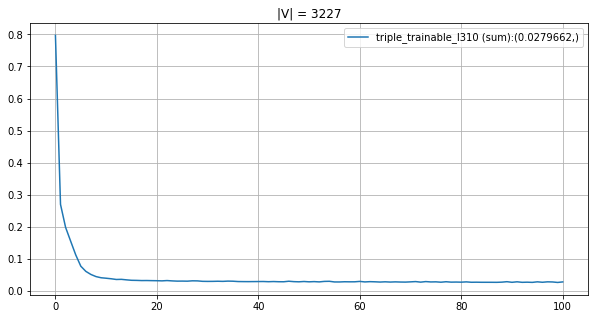

In [28]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [29]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [3.33728559e-01 4.90985614e-04 1.68201443e-05 1.78109390e-04
 3.80191660e-04 8.91331496e-06 6.37599210e-04 1.60387508e-03
 5.88005966e-05 7.67699962e-05 2.76484757e-04 1.65052199e-05
 2.14728463e-04 4.19072613e-03 1.92983804e-05 9.71352363e-05
 3.59400183e-04 2.39654603e-05 1.12254731e-02 5.39353303e-01
 1.30331958e-03 8.66493483e-05 9.41207910e-04 2.56100434e-05
 1.18709034e-04 6.25932153e-04 4.48606829e-05 2.18782844e-04
 5.48781443e-03 2.53191602e-04 1.33247714e-04 6.82418673e-04
 1.81802895e-05 1.21204599e-04 8.01194740e-04 5.01401031e-05
 1.02556852e-04 1.84176881e-03 4.42660136e-05 5.65892232e-02
 3.19473790e-02 1.24820451e-03 2.18195737e-04 2.12237369e-03
 2.01592371e-03]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.7722945292050212>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([ 4.86011712, -1.6615513 , -5.03538889, -2.67556822, -1.91729063,
         -5.6704199 , -1.40025624, -0.47778822, -3.78381413, -3.51715224,
         -2.23581043, -5.05428944, -2.48859186,  0.48266317, -4.89794495,
         -3.28186193, -1.97352964, -4.68135249,  1.46797473,  5.34015999,
         -0.68529631, -3.39609663, -1.01080206, -4.61498153, -3.08129072,
         -1.41872414, -4.05440437, -2.46988647,  0.75231923, -2.3238196 ,
         -2.96575622, -1.33232277, -4.95762811, -3.06048611, -1.17186209,
         -3.94314498, -3.22754883, -0.33948443, -4.06774893,  3.08560772,
          2.5138793 , -0.72850472, -2.47257359, -0.19767572, -0.24913334])>]]

# eu Core

In [21]:
G, distances_matrix, r_matrix  = utils.get_dataset("eu-core.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/eu-core.edges
|V| = 986, |E| = 16687


In [22]:
dists = make_distances_ttl3(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

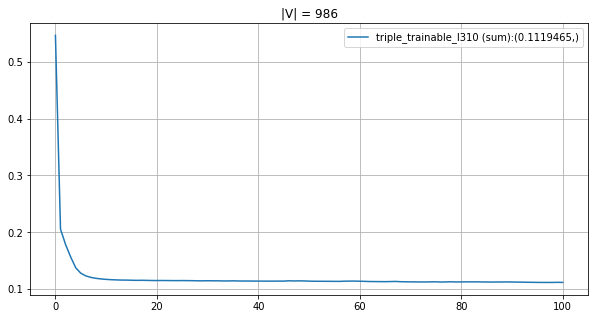

In [23]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [24]:
get_dists_weights_osw(dists)

triple_trainable_l310 (sum) : [4.53692375e-01 5.51656098e-04 8.13185998e-05 6.61544006e-03
 6.09085313e-04 1.34355267e-04 8.95149334e-04 7.96070822e-04
 1.92020808e-04 5.44962819e-04 8.08635385e-04 2.49183853e-04
 1.87973393e-03 1.43381183e-03 2.91582151e-04 1.99240251e-03
 2.81550285e-01 1.53680576e-01 7.14566384e-04 4.63710397e-04
 1.85971588e-04 6.94087342e-04 2.35042495e-03 2.76698713e-03
 4.36885814e-04 1.82257501e-03 2.70208469e-04 6.48170434e-04
 3.16921772e-03 2.93298713e-04 1.82322916e-03 1.81524661e-03
 1.03837518e-02 1.76481310e-03 1.00623557e-03 5.59148454e-03
 3.79658394e-02 7.40288815e-03 7.84540260e-03 4.95047015e-04
 1.99488430e-03 4.66426890e-04 5.39671949e-04 7.70579639e-04
 3.19750903e-04]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.6932853067748761>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(45,) dtype=float64, numpy=
  array([ 5.07292892, -1.63932089, -3.55387096,  0.84491586, -1.54028739,
         -3.05175819, -1.15525518, -1.27255758, -2.69464199, -1.65152816,
         -1.25689762, -2.43405474, -0.41336022, -0.68415394, -2.27692395,
         -0.35514925,  4.59582061,  3.99038581, -1.38056983, -1.81298552,
         -2.72665183, -1.40964793, -0.18989432, -0.02673141, -1.87257387,
         -0.44424011, -2.35305197, -1.47809206,  0.10899433, -2.27105415,
         -0.44388126, -0.44826912,  1.29575181, -0.47644566, -1.03827424,
          0.67675437,  2.59219634,  0.95737976,  1.01543725, -1.747593  ,
         -0.3539044 , -1.80714445, -1.66128428, -1.30510273, -2.18470347])>]]